In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car_df = pd.read_csv('ford.csv')

In [4]:
car_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [5]:
car_df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [6]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [8]:
car_df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

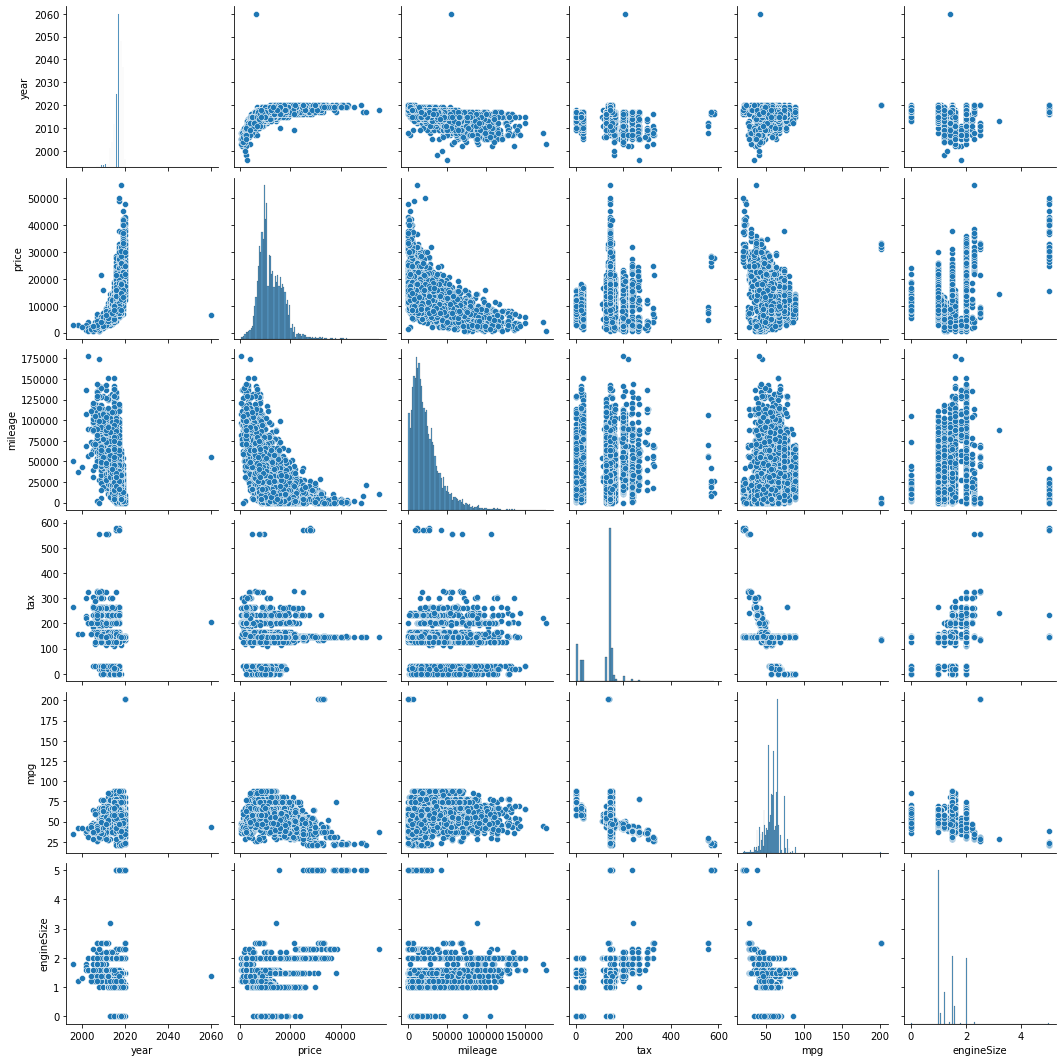

In [13]:
sns.pairplot(car_df)

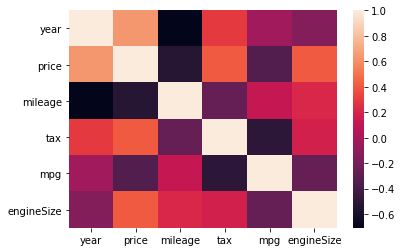

In [19]:
sns.heatmap(car_df.corr())

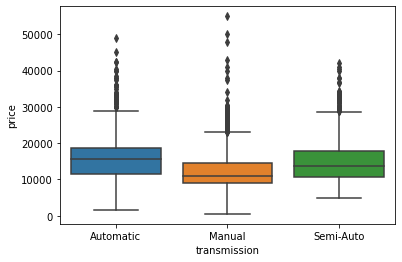

In [20]:
sns.boxplot(data=car_df, x='transmission', y='price')

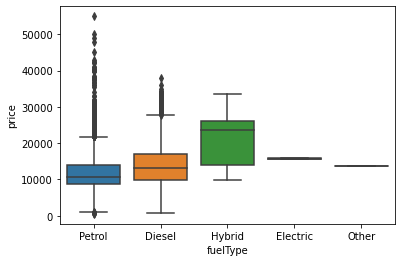

In [21]:
sns.boxplot(data=car_df, x='fuelType', y='price')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

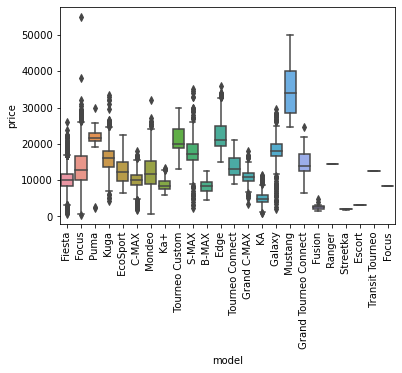

In [23]:
sns.boxplot(data=car_df, x='model', y='price')
plt.xticks(rotation=90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e92e64610>,
      dtype=object)

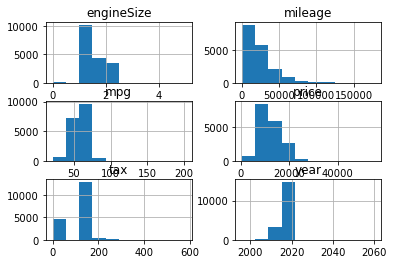

In [76]:
car_df.hist()

In [75]:
from sklearn.preprocessing import MinMaxScaler

In [77]:
# rescale all continuous variables
# ['year', 'price', 'mileage', 'tax','mpg', 'engineSize']
scaler = MinMaxScaler()

In [84]:
car_df[['year', 'price', 'mileage', 'tax','mpg', 'engineSize']] = scaler.fit_transform(car_df[['year', 'price', 'mileage', 'tax','mpg', 'engineSize']])


In [85]:
car_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,0.328125,0.211101,Automatic,0.089747,Petrol,0.258621,0.203867,0.2
1,Focus,0.343750,0.247798,Manual,0.051125,Petrol,0.258621,0.203867,0.2
2,Focus,0.328125,0.229450,Manual,0.070113,Petrol,0.258621,0.203867,0.2
3,Fiesta,0.359375,0.312018,Manual,0.058877,Petrol,0.250000,0.107735,0.3
4,Fiesta,0.359375,0.293670,Automatic,0.008337,Petrol,0.250000,0.154144,0.2


In [86]:
# Change categorical data in dummy variables:
# Regression results are easiest to interpret when dummy variables are limited to two specific values, 1 or 0. 
# Typically, 1 represents the presence of a qualitative attribute, and 0 represents the absence.
X = car_df[['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize']]
X = pd.get_dummies(data=X, drop_first=True)
X.head()



,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.328125,0.089747,0.258621,0.203867,0.2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0.343750,0.051125,0.258621,0.203867,0.2,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.328125,0.070113,0.258621,0.203867,0.2,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.359375,0.058877,0.250000,0.107735,0.3,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,0.359375,0.008337,0.250000,0.154144,0.2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [87]:
y = car_df['price']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [89]:
linear_regression = LinearRegression()

In [90]:
linear_regression.fit(X_train, y_train)

LinearRegression()

In [91]:
linear_regression.coef_

array([ 1.19399235e+00, -2.29191631e-01, -8.87151564e-03, -2.71742851e-01,
        2.25620068e-01,  2.21027810e-02,  3.30690387e-02,  1.68440020e-01,
        2.47327543e-01,  2.30174153e-02,  6.15702390e-02,  7.36925099e-02,
        1.28600637e-01,  2.97658636e-02,  7.86997603e-02, -1.10316424e-02,
       -5.15396115e-02,  7.13493055e-02,  5.59245580e-02,  2.18386822e-01,
        1.51465049e-01,  1.10782560e-01,  1.20009314e-01, -1.38777878e-17,
        5.82843650e-02,  1.26173138e-01,  0.00000000e+00, -5.95081236e-04,
       -7.39043803e-03, -1.89737808e-03,  3.70832104e-02,  1.34668348e-01,
        1.80170741e-02, -6.62087789e-03])

In [92]:
predictions = linear_regression.predict(X_test)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


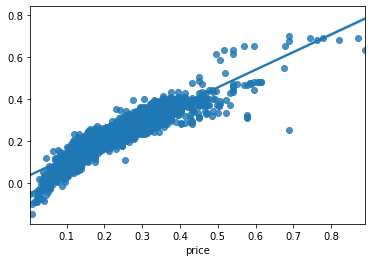

In [93]:
sns.regplot(y_test, predictions)

In [94]:
import statsmodels.api as sm

In [95]:
# get R^2 or goodness of fit
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     2039.
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        10:42:23   Log-Likelihood:                 24408.
No. Observations:               12576   AIC:                        -4.875e+04
Df Residuals:                   12543   BIC:                        -4.850e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [96]:
from sklearn.metrics import mean_squared_error

In [97]:
# Get RMSE - standard deviation of residuals (prediction errors)
rmse = mean_squared_error(y_test, predictions, squared=False)

In [98]:
rmse

0.033880097951535626

# Try out different linear models and compare

1. ElasticNet
2. Ridge
3. Lasso

In [99]:
from sklearn.linear_model import ElasticNet

In [100]:
en = ElasticNet()

In [101]:
en.fit(X_train, y_train)

ElasticNet()

In [102]:
en_predictions = en.predict(X_test)

In [103]:
# Get RMSE - standard deviation of residuals (prediction errors)
rmse_en = mean_squared_error(y_test, en_predictions, squared=False)
rmse_en

0.08809109073147045

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


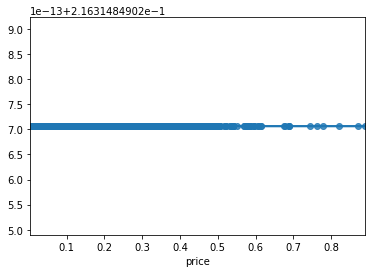

In [116]:
sns.regplot(y_test, en_predictions)

In [104]:
from sklearn.linear_model import Ridge

In [105]:
ridge = Ridge()

In [106]:
ridge.fit(X_train, y_train)

Ridge()

In [107]:
ridge_predictions = ridge.predict(X_test)

In [108]:
rmse_ridge = mean_squared_error(y_test, ridge_predictions, squared=False)
rmse_ridge

0.03430805663846994

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


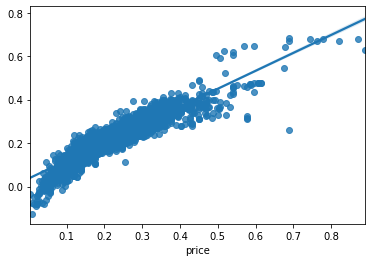

In [118]:
sns.regplot(y_test, ridge_predictions)

In [109]:
from sklearn.linear_model import Lasso

In [110]:
lasso = Lasso()

In [111]:
lasso.fit(X_train,y_train)

Lasso()

In [112]:
lasso_predictions = lasso.predict(X_test)

In [113]:
rmse_lasso = mean_squared_error(y_test, lasso_predictions, squared=False)
rmse_lasso

0.08809109073147045

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


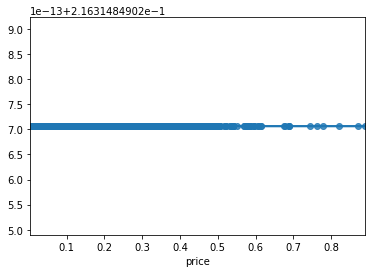

In [117]:
sns.regplot(y_test, lasso_predictions)

In [114]:
rmses = [rmse, rmse_en, rmse_ridge, rmse_lasso]
models = ['Linear regression', 'Elastic net', 'Ridge', 'Lasso']
rmse_df = pd.DataFrame()
rmse_df['model'] = models
rmse_df['rmse'] = rmses

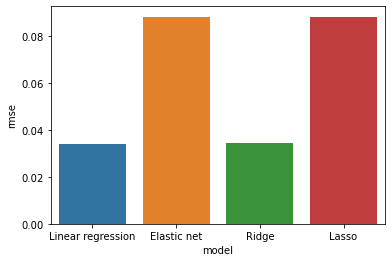

In [115]:
sns.barplot(data=rmse_df, x='model', y='rmse')

Elastic net performed the worst - combines L1 and L2 penalty functions of lasso and ridge methods
Lasso performed poorly - L1 prior as regulizer

Ridge & linear regression performed best